In [13]:
from astropy.table import Table,join
import fitsio
import numpy as np
from matplotlib import pyplot as plt
import os,sys

In [2]:
from desitarget import targetmask

In [3]:
fd = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/main/LSS/datcomb_dark_spec_premtlup.fits')

In [4]:
fd.dtype.names

('TARGETID',
 'CHI2',
 'COEFF',
 'Z',
 'ZERR',
 'ZWARN',
 'NPIXELS',
 'SPECTYPE',
 'SUBTYPE',
 'NCOEFF',
 'DELTACHI2',
 'NUMEXP',
 'NUMTILE',
 'PETAL_LOC',
 'DEVICE_LOC',
 'LOCATION',
 'FIBER',
 'FIBERSTATUS',
 'TARGET_RA',
 'TARGET_DEC',
 'PMRA',
 'PMDEC',
 'REF_EPOCH',
 'LAMBDA_REF',
 'FA_TARGET',
 'FA_TYPE',
 'OBJTYPE',
 'FIBERASSIGN_X',
 'FIBERASSIGN_Y',
 'PRIORITY',
 'SUBPRIORITY',
 'OBSCONDITIONS',
 'RELEASE',
 'BRICKID',
 'BRICK_OBJID',
 'MORPHTYPE',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'MASKBITS',
 'REF_ID',
 'REF_CAT',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'PARALLAX',
 'BRICKNAME',
 'EBV',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'SERSIC',
 'SHAPE_R',
 'SHAPE_E1',
 'SHAPE_E2',
 'PHOTSYS',
 'PRIORITY_INIT',
 'NUMOBS_INIT',
 'DESI_TARGET',
 'BGS_TARGET',
 'MWS_TARGET',
 'SCN

In [6]:
selgh = (fd['ZWARN'] & 2**9) == 0
print(len(fd[selgh]))
fgh = fd[selgh]

943907


In [20]:
selzlya = ((fgh['Z'] > 2.1) & (fgh['SPECTYPE'] == 'QSO'))
print(len(fgh[selzlya]))
selzlya |= ((fgh['IS_QSO_QN'] == True) & (fgh['Z_QN'] > 2.1))
print(len(fgh[selzlya]))

58663
67943


In [8]:
fly = fgh[selzlya]

(array([ 3., 17., 76., 88., 41.,  3.,  0.,  0.,  0.,  2.]),
 array([0.05112373, 0.05754516, 0.06396659, 0.07038802, 0.07680945,
        0.08323088, 0.0896523 , 0.09607373, 0.10249516, 0.10891659,
        0.11533802]),
 <a list of 10 Patch objects>)

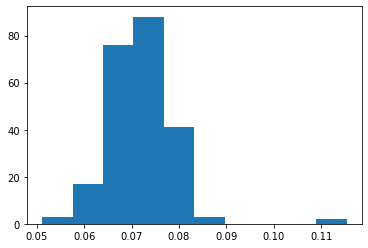

In [9]:
tls = np.unique(fgh['TILEID'])
fracly = []
for tl in tls:
    sel = fgh['TILEID'] == tl
    ng = len(fgh[sel])
    sel = fly['TILEID'] == tl
    nly = len(fly[sel])
    fracly.append(nly/ng)
plt.hist(fracly)    

In [10]:
mt = Table.read('/global/cfs/cdirs/desi/survey/ops/surveyops/trunk/ops/tiles-main.ecsv')

In [11]:
mt.keep_columns(['TILEID','RA','DEC'])

In [15]:
tlst = Table()
tlst['TILEID'] = tls

In [16]:
tls = join(tlst,mt,keys=['TILEID'])

Text(0.5, 1.0, 'fraction of observations selected for lya follow-up')

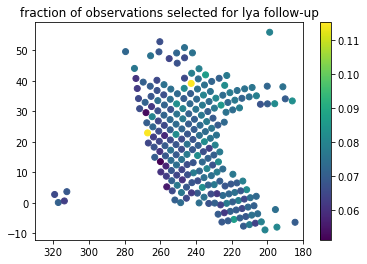

In [23]:
plt.scatter(tls['RA'],tls['DEC'],c=fracly)
plt.xlim(330,180)
plt.colorbar()
plt.title('fraction of observations selected for lya follow-up')

In [21]:
tls['fraclya'] = fracly

In [22]:
w = tls['fraclya'] > 0.1
tls[w]

TILEID,RA,DEC,fraclya
int64,float64,float64,float64
1735,242.718,39.133,0.11533801793070027
1930,267.139,22.932,0.11506326092146096


In [24]:
60*.08

4.8